### K-NEAREST NEIGHBORS

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### DATASET

In [3]:
df = pd.read_csv("C://Users//ertug//Desktop//Machine_Learning_Courses//_3_Classification//diabetes.csv//diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
y = df["Outcome"]

In [6]:
X = df.drop(["Outcome"], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=.3,
                                                    random_state=42)

### MODEL & TRAINING

In [8]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [9]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_y',
 'algorithm',
 'classes_',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_samples_fit_',
 'outputs_2d_',
 'p'

In [10]:
y_pred = knn_model.predict(X_test)

In [11]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.5582905262390825

In [12]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [13]:
r2_score(y_test, y_pred)

-0.3768211920529805

In [14]:
confusion_matrix(y_test, y_pred)

array([[114,  37],
       [ 35,  45]], dtype=int64)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [16]:
knn_model.predict_proba(X_test)[: 10]

array([[0.4, 0.6],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6]])

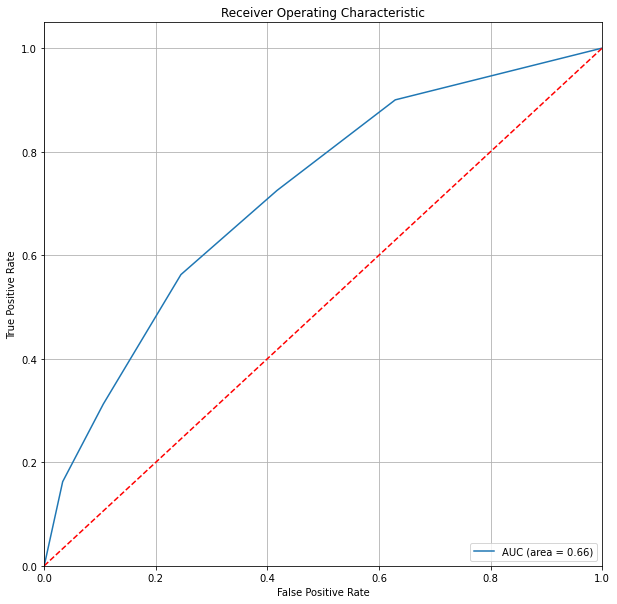

In [17]:
logit_roc_auc = roc_auc_score(y_test, knn_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("LOG_ROC")
plt.grid(1)
plt.show()

### MODEL TUNING

In [18]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [19]:
knn_params = {"n_neighbors": np.arange(1, 51)}

In [20]:
knn_cv_model = GridSearchCV(knn_model, knn_params, verbose=2, n_jobs=-1, cv=10).fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   18.0s finished


In [21]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [22]:
knn_cv_model.best_score_

0.748637316561845

In [23]:
knn_tuned = KNeighborsClassifier(n_neighbors=knn_cv_model.best_params_.get("n_neighbors")).fit(X_train, y_train)

In [24]:
y_pred = knn_tuned.predict(X_test)

In [25]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.5180716826832639

In [26]:
accuracy_score(y_test, y_pred)

0.7316017316017316

In [27]:
knn_tuned.score(X_test, y_test)  # Accuracy Score --> .score(X_test, y_test)

0.7316017316017316

In [28]:
r2_score(y_test, y_pred)

-0.18559602649006646

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.57      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



In [30]:
knn_tuned.predict_proba(X_test)[: 10]

array([[0.45454545, 0.54545455],
       [0.63636364, 0.36363636],
       [0.72727273, 0.27272727],
       [0.63636364, 0.36363636],
       [0.45454545, 0.54545455],
       [0.54545455, 0.45454545],
       [1.        , 0.        ],
       [0.63636364, 0.36363636],
       [0.54545455, 0.45454545],
       [0.45454545, 0.54545455]])

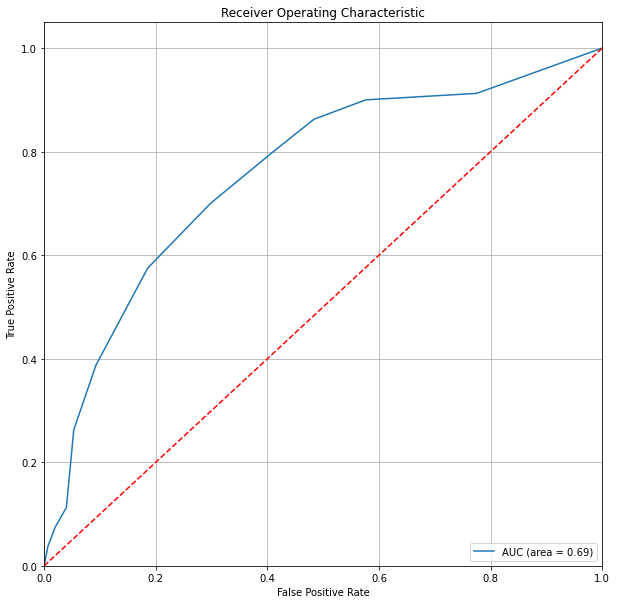

In [31]:
logit_roc_auc = roc_auc_score(y_test, knn_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn_tuned.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("LOG_ROC")
plt.grid(1)
plt.show()